# implement support vector machine (SVM) to classify image of cat and Dog

In [4]:
# all necessary imports  
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# all categories
Categories=['cat','dog']

flat_data_arr=[] #input array
target_arr=[] #output array

#path which contains all the categories of images
datadir=r'\Users\Downloads\cats-vs-dogs' 

In [6]:
#import Shuffle to shuffle image of cat and dog
from random import shuffle

all_files=os.listdir(datadir)
shuffle(all_files)

In [7]:
#loop throup image to read and convert in to flatten binary data
for img in all_files[:100]:
    img_array=imread(os.path.join(datadir,img))
    # resize image
    img_resized=resize(img_array,(150,150,3))
    if img.find("cat")!=-1:
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(0)
    if img.find("dog") !=-1:
        flat_data_arr.append(img_resized.flatten()) 
        target_arr.append(1)
        
print(f'Image loaded successfully')


Image loaded successfully


In [8]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

In [9]:
#make model
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}

svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [10]:
# separate train and test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


In [11]:
#check accuracy of our model
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)

print("The predicted Data is :")
print(y_pred)

print("The actual data is:")
print(np.array(y_test))

print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0]
The actual data is:
[0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1]
The model is 65.0% accurate


Enter URL of Image :C:\Users\ankit\Downloads\roxy-redtag-oc8.png


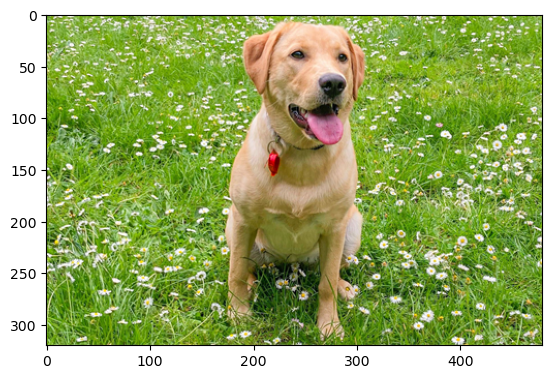

cat = 27.782907909776355%
dog = 72.21709209022364%
The predicted image is : dog


In [18]:
# enter image url and check is it cat or dog
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]

probability=model.predict_proba(l)

for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
    
print("The predicted image is : "+Categories[model.predict(l)[0]])

Enter URL of Image :C:\Users\ankit\Downloads\cat.jpg


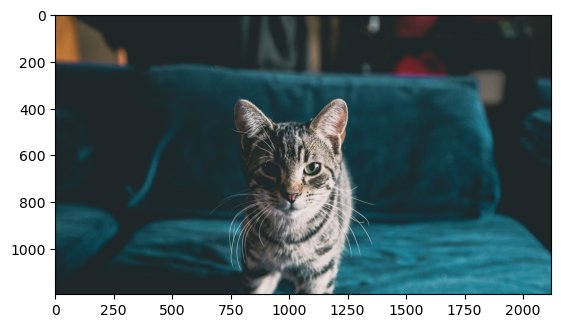

cat = 69.24564811498038%
dog = 30.75435188501961%
The predicted image is : cat


In [19]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]

probability=model.predict_proba(l)

for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
    
print("The predicted image is : "+Categories[model.predict(l)[0]])